# 1. Importing the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve,roc_auc_score

# 2. Import the Dataset


In [2]:
df = pd.read_csv('data_response.csv')

In [3]:
df.head(3)

,Unnamed: 0,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,10770,10771,Female,42,1,11.0,0,1-2 Year,Yes,48521.0,122.0,206,1
1,19506,19507,Male,48,1,34.0,0,1-2 Year,Yes,2630.0,156.0,223,1
2,6228,6229,Male,76,1,28.0,1,1-2 Year,No,29620.0,26.0,69,0


# 3. Check the basic statistics of the whole dataset and give theinterpretations
* Discuss the need of basic statistics in data science


In [4]:
df.describe()

,Unnamed: 0,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7351.088300,7352.088300,40.018900,0.998000,26.447800,0.330000,31125.978400,106.871600,154.910000,0.350000
std,7130.381057,7130.381057,14.850555,0.044679,12.719947,0.470236,16975.427752,55.389534,83.716177,0.476993
min,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,2499.750000,2500.750000,26.000000,1.000000,15.000000,0.000000,24867.250000,26.000000,83.000000,0.000000
50%,4999.500000,5000.500000,39.000000,1.000000,28.000000,0.000000,32234.000000,124.000000,155.000000,0.000000
75%,8036.250000,8037.250000,50.000000,1.000000,34.000000,1.000000,40251.500000,152.000000,227.000000,1.000000
max,28123.000000,28124.000000,84.000000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


# 4. Show the dependent variable (Response) distribution and write the observations of it.

<AxesSubplot:xlabel='Response', ylabel='Density'>

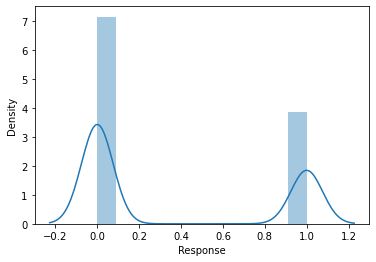

In [5]:
sns.distplot(df.Response)

# 5. show that how the independent variables are distributed with dependent variable
Note: Use groupby or hue in plotting

<AxesSubplot:xlabel='Gender', ylabel='Age'>

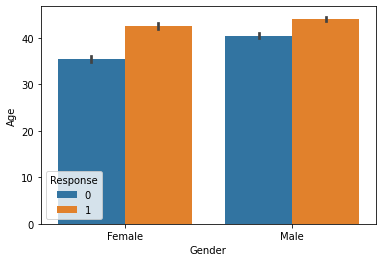

In [6]:
sns.barplot(x = 'Gender', y= 'Age' , hue = 'Response',data = df)

# 6. Do the required Data Preprocessing
Note:
1. Discuss about what is encoding why do we need encoding and Discuss about Lable
encoding and Onehot encoding
2. Convert all categorical columns into numerical by using
Lable encoder or
one hot encoder or
get dummies or
use any method of mapping

In [7]:
df = df.drop(columns = (['Unnamed: 0','id']),axis = 1)

In [8]:
df_dummy= pd.get_dummies(df,drop_first=True)

In [9]:
df_dummy.shape

(10000, 12)

In [10]:
df_dummy.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,42,1,11.0,0,48521.0,122.0,206,1,0,0,0,1
1,48,1,34.0,0,2630.0,156.0,223,1,1,0,0,1
2,76,1,28.0,1,29620.0,26.0,69,0,1,0,0,0
3,48,1,15.0,0,29781.0,26.0,140,1,1,0,0,1
4,41,1,46.0,0,23826.0,124.0,261,1,1,0,0,1


# 7. Devide the whole data into X and y
Note:
Use that iloc or loc methods


In [11]:
df_dummy['Vehicle_Age_SM_1_Year'] = df_dummy['Vehicle_Age_< 1 Year']
df_dummy['Vehicle_Age_GR_2_Years'] = df_dummy['Vehicle_Age_> 2 Years']

In [12]:
df_dummy.drop(columns = (['Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Years']),axis = 1 , inplace=True)

In [13]:
df_dummy.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Gender_Male', 'Vehicle_Damage_Yes', 'Vehicle_Age_SM_1_Year',
       'Vehicle_Age_GR_2_Years'],
      dtype='object')

In [14]:
# Splitting data into independent and dependent
X = df_dummy[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured','Annual_Premium', 'Policy_Sales_Channel', 'Vintage','Gender_Male','Vehicle_Damage_Yes','Vehicle_Age_SM_1_Year','Vehicle_Age_GR_2_Years']]# independent variable

Y = df_dummy['Response'] # dependent variable

In [15]:
X.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_SM_1_Year,Vehicle_Age_GR_2_Years
0,42,1,11.0,0,48521.0,122.0,206,0,1,0,0
1,48,1,34.0,0,2630.0,156.0,223,1,1,0,0
2,76,1,28.0,1,29620.0,26.0,69,1,0,0,0
3,48,1,15.0,0,29781.0,26.0,140,1,1,0,0
4,41,1,46.0,0,23826.0,124.0,261,1,1,0,0


In [16]:
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Response, dtype: int64

# 8. split the data into train and test
Note:

* Use train test split method

* Discuss that why do we need train and test split in model fitting

In [17]:
# split the data into two parts training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3)


In [18]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7000, 11), (3000, 11), (7000,), (3000,))

# 9. Apply The Random Forest Model.


In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [20]:
y_pred = classifier.predict(X_test)

# 10. Find The Classification Metrics and Give the Observations to
Metric for Random Forest algorithms

Discuss the every metric and why these metrics are usefull for model.

* Confusion Matrix

    * Precision

    * Recall

    * Specificity

    * Sensitivity

    * Accuracy

    * F1-score
    
    * True Positive Rate

    * False Positive Rate

* Classification Report

* ROC_AUC Curve



In [21]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, y_pred) 
accuracy = metrics.accuracy_score(Y_test, y_pred) 
precision = metrics.precision_score(Y_test, y_pred) 
recall = metrics.recall_score(Y_test, y_pred)

print(cm)
print("Accuracy score:",accuracy)
print("Precision score:",precision)
print("Recall score:",recall)

[[1528  411]
 [ 319  742]]
Accuracy score: 0.7566666666666667
Precision score: 0.6435385949696444
Recall score: 0.6993402450518379


In [22]:
# classification_report
print(classification_report(Y_test, y_pred))
print('accuracy_score : ',accuracy_score(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1939
           1       0.64      0.70      0.67      1061

    accuracy                           0.76      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.76      0.76      0.76      3000

accuracy_score :  0.7566666666666667


In [23]:
# Generate predictions

predictions_train = classifier.predict(X_train)
predictions_test = classifier.predict(X_test)

In [24]:
# find False Positive Rate & True Positive Rate

FPR, TPR, a = roc_curve(Y_train, predictions_train)
FPR1, TPR1, a1 = roc_curve(Y_test,predictions_test)

In [25]:
print(FPR, TPR, a)
print(FPR1, TPR1, a1)

[0. 0. 1.] [0. 1. 1.] [2 1 0]
[0.         0.21196493 1.        ] [0.         0.69934025 1.        ] [2 1 0]


In [26]:
# calculate AUC

auc_train = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train)

auc_test = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test)

Train AUC: 1.000
Test AUC: 0.744


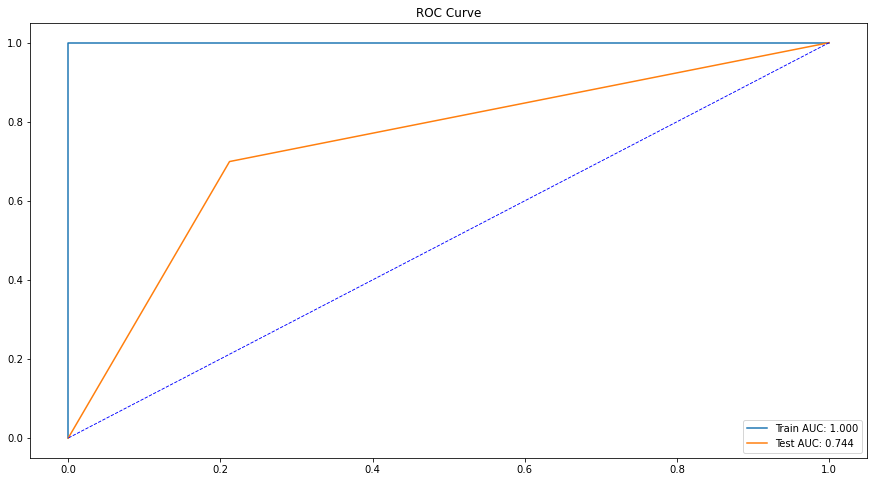

In [27]:
# plot the ROC curve

plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

# 12. Apply ada boosting and gradient boosting models


In [28]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adaclass = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model_adaclass = adaclass.fit(X_train, Y_train)
y_pred_adaclass = model_adaclass.predict(X_test)

In [29]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_model.fit(X_train, Y_train)
y_pred_gb_model = gb_model.predict(X_test)

# 13. Find The Classification Metrics and Give the Observations to Metric for ada and gradient boosting algorithms
* Confusion Matrix

    * Precision

    * Recall

    * Specificity

    * Sensitivity

    * Accuracy

    * F1-score

    * True Positive Rate

    * False Positive Rate

* Classification Report

* ROC_AUC Curve



### AdaBoostClassifier

In [30]:
cm_ab = metrics.confusion_matrix(Y_test, y_pred_adaclass) 
accuracy_ab = metrics.accuracy_score(Y_test, y_pred_adaclass) 
precision_ab = metrics.precision_score(Y_test, y_pred_adaclass) 
recall_ab = metrics.recall_score(Y_test, y_pred_adaclass)

print(cm_ab)
print("Accuracy score:",accuracy_ab)
print("Precision score:",precision_ab)
print("Recall score:",recall_ab)

[[1488  451]
 [ 233  828]]
Accuracy score: 0.772
Precision score: 0.6473807662236122
Recall score: 0.7803958529688972


In [31]:
# classification_report
print(classification_report(Y_test, y_pred_adaclass))
print('accuracy_score : ',accuracy_score(Y_test,y_pred_adaclass))



              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1939
           1       0.65      0.78      0.71      1061

    accuracy                           0.77      3000
   macro avg       0.76      0.77      0.76      3000
weighted avg       0.79      0.77      0.78      3000

accuracy_score :  0.772


In [32]:
# Generate predictions

predictions_train_ab = model_adaclass.predict(X_train)
predictions_test_ab = model_adaclass.predict(X_test)

In [33]:
# find False Positive Rate & True Positive Rate

FPR_1, TPR_1, b = roc_curve(Y_train, predictions_train_ab)
FPR_2, TPR_2, b1 = roc_curve(Y_test,predictions_test_ab)

In [34]:
print(FPR_1, TPR_1, b)
print(FPR_2, TPR_2, b1)

[0.         0.23898268 1.        ] [0.         0.79827798 1.        ] [2 1 0]
[0.         0.23259412 1.        ] [0.         0.78039585 1.        ] [2 1 0]


In [35]:
# calculate AUC

auc_train_1 = auc(FPR_1, TPR_1)
print('Train AUC: %0.3f' % auc_train_1)

auc_test_1 = auc(FPR_2, TPR_2)
print('Test AUC: %0.3f' % auc_test_1)

Train AUC: 0.780
Test AUC: 0.774


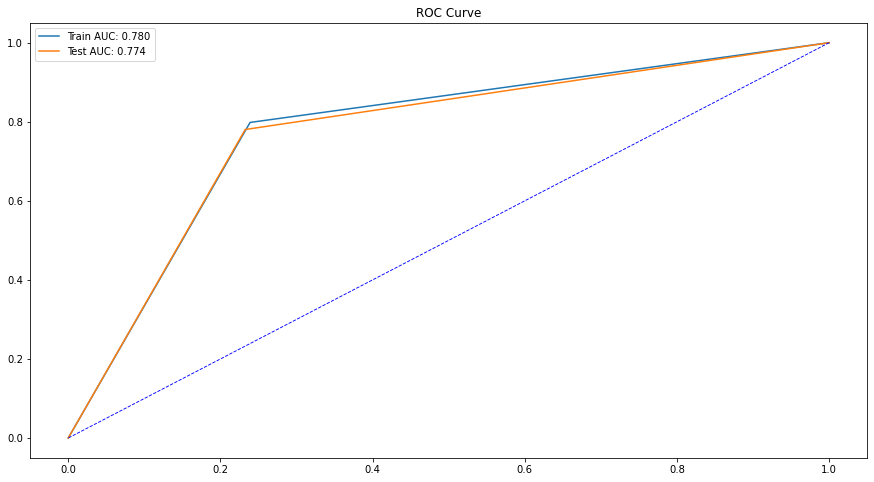

In [36]:
# plot the ROC curve

plt.figure(figsize=(15,8))
plt.plot(FPR_1, TPR_1, label = 'Train AUC: %0.3f'%auc_train_1)
plt.plot(FPR_2, TPR_2, label = 'Test AUC: %0.3f'%auc_test_1)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

### GradientBoostingClassifier

In [37]:
cm_gb = metrics.confusion_matrix(Y_test, y_pred_gb_model) 
accuracy_gb = metrics.accuracy_score(Y_test, y_pred_gb_model) 
precision_gb = metrics.precision_score(Y_test, y_pred_gb_model) 
recall_gb = metrics.recall_score(Y_test, y_pred_gb_model)

print(cm_gb)
print("Accuracy score:",accuracy_gb)
print("Precision score:",precision_gb)
print("Recall score:",recall_gb)

[[1484  455]
 [ 225  836]]
Accuracy score: 0.7733333333333333
Precision score: 0.6475600309837335
Recall score: 0.7879359095193214


In [38]:
# classification_report
print(classification_report(Y_test, y_pred_gb_model))
print('accuracy_score : ',accuracy_score(Y_test,y_pred_gb_model))


              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1939
           1       0.65      0.79      0.71      1061

    accuracy                           0.77      3000
   macro avg       0.76      0.78      0.76      3000
weighted avg       0.79      0.77      0.78      3000

accuracy_score :  0.7733333333333333


In [39]:
# Generate predictions

predictions_train_gb = gb_model.predict(X_train)
predictions_test_gb = gb_model.predict(X_test)

In [40]:
# find False Positive Rate & True Positive Rate

FPR_011, TPR_011, c = roc_curve(Y_train, predictions_train_gb)
FPR_022, TPR_022, c1 = roc_curve(Y_test,predictions_test_gb)

In [41]:
print(FPR_011, TPR_011, c)
print(FPR_022, TPR_022, c1)

[0.         0.24402543 1.        ] [0.         0.80729807 1.        ] [2 1 0]
[0.         0.23465704 1.        ] [0.         0.78793591 1.        ] [2 1 0]


In [42]:
# calculate AUC

auc_train_3 = auc(FPR_011, TPR_011)
print('Train AUC: %0.3f' % auc_train_3)

auc_test_3 = auc(FPR_022, TPR_022)
print('Test AUC: %0.3f' % auc_test_3)

Train AUC: 0.782
Test AUC: 0.777


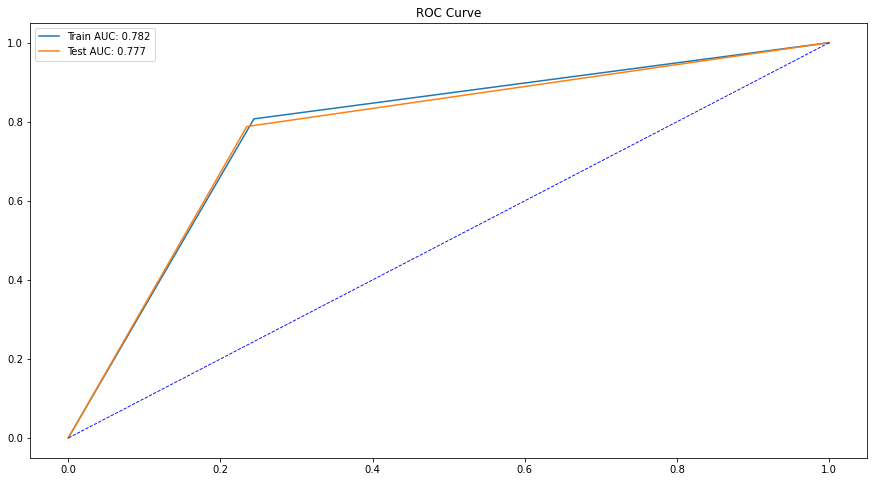

In [43]:
# plot the ROC curve

plt.figure(figsize=(15,8))
plt.plot(FPR_011, TPR_011, label = 'Train AUC: %0.3f'%auc_train_3)
plt.plot(FPR_022, TPR_022, label = 'Test AUC: %0.3f'%auc_test_3)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

# 15. Try to find out according to metrics which algorithm is appropriate for the given data

for the Given data i tested 3 model, one is Random Foresy and another is ADA Boosting & Gradient Boosting , and after checking all those 3 model precision,recall,f1-score,support,accuracy,macro avg,weighted avg,accuracy_score,Train AUC,Test AUC, and then i found that The Gradient Boosting Model is better Curve and accuracy ponint.

# 17. Discuss what is the difference between model parameters and hyper parameters

In [47]:
from sklearn.model_selection import GridSearchCV
pram_grid = {'n_estimators' : [20,50,100],
            'criterion': ['gini', 'entropy'],
            'max_features':[1,2,3]}
model_hyp = RandomForestClassifier()
grid_results = GridSearchCV(model_hyp, pram_grid, cv = 5)
grid_results.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [1, 2, 3],
                         'n_estimators': [20, 50, 100]})

In [48]:
y_pred_hyp = grid_results.predict(X_test)

In [50]:
start = time.time()

grid_results.fit(X_train.values, Y_train.values)

end = time.time()

print(end-start)

30.927688121795654


# 18. Apply the Hyper parameter tuning for Random forest algorithm and now check the metrics

* Confusion Matrix

    * Precision

    * Recall

    * Specificity

    * Sensitivity

    * Accuracy

    * F1-score

    * True Positive Rate

    * False Positive Rate

* Classification Report

* ROC_AUC Curve

In [51]:
print('best_score_ : ',grid_results.best_score_)
print('best_params_ : ', grid_results.best_params_)
print('best_estimator_ : ', grid_results.best_estimator_)


best_score_ :  0.7515714285714286
best_params_ :  {'criterion': 'entropy', 'max_features': 3, 'n_estimators': 100}
best_estimator_ :  RandomForestClassifier(criterion='entropy', max_features=3)


In [52]:
cm_hyp = metrics.confusion_matrix(Y_test, y_pred_hyp) 
accuracy_hyp = metrics.accuracy_score(Y_test, y_pred_hyp) 
precision_hyp = metrics.precision_score(Y_test, y_pred_hyp) 
recall_hyp = metrics.recall_score(Y_test, y_pred_hyp)

print(cm_hyp)
print("Accuracy score:",accuracy_hyp)
print("Precision score:",precision_hyp)
print("Recall score:",recall_hyp)

[[1528  411]
 [ 328  733]]
Accuracy score: 0.7536666666666667
Precision score: 0.6407342657342657
Recall score: 0.6908576814326107


In [53]:
# classification_report
print(classification_report(Y_test, y_pred_hyp))
print('accuracy_score : ',accuracy_score(Y_test,y_pred_hyp))


              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1939
           1       0.64      0.69      0.66      1061

    accuracy                           0.75      3000
   macro avg       0.73      0.74      0.74      3000
weighted avg       0.76      0.75      0.76      3000

accuracy_score :  0.7536666666666667


In [54]:
# Generate predictions

predictions_train_hyp = grid_results.predict(X_train)
predictions_test_hyp = grid_results.predict(X_test)

In [55]:
# find False Positive Rate & True Positive Rate

FPR_001, TPR_001, d = roc_curve(Y_train, predictions_train_hyp)
FPR_002, TPR_002, d1 = roc_curve(Y_test,predictions_test_hyp)

In [56]:
print(FPR_001, TPR_001, d)
print(FPR_002, TPR_002, d1)

[0. 0. 1.] [0. 1. 1.] [2 1 0]
[0.         0.20577617 1.        ] [0.         0.67577757 1.        ] [2 1 0]


In [57]:
# calculate AUC

auc_train_4 = auc(FPR_001, TPR_001)
print('Train AUC: %0.3f' % auc_train_4)

auc_test_4 = auc(FPR_002, TPR_002)
print('Test AUC: %0.3f' % auc_test_4)

Train AUC: 1.000
Test AUC: 0.735


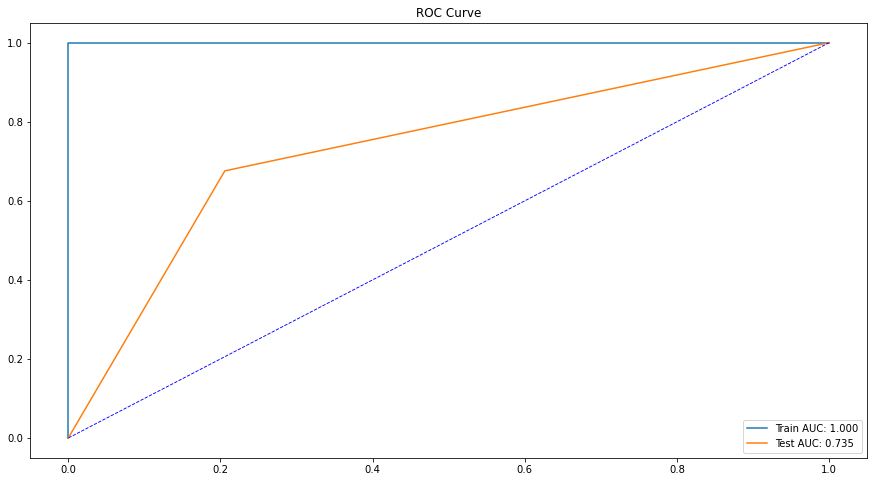

In [58]:
# plot the ROC curve

plt.figure(figsize=(15,8))
plt.plot(FPR_001, TPR_001, label = 'Train AUC: %0.3f'%auc_train_4)
plt.plot(FPR_002, TPR_002, label = 'Test AUC: %0.3f'%auc_test_4)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

# 19. Now discuss that what you find difference from model parameter and hyper parameters in Random forest algorithm